In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [2]:
PATH = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv')
df = pd.read_csv(PATH, header=None, error_bad_lines=False)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.

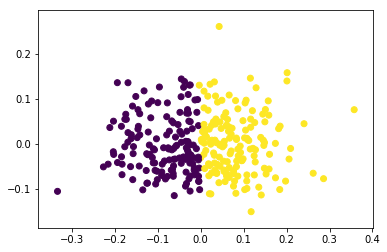

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99
Wall time: 893 ms


In [4]:
%%time

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model isn't doing very well. We're correctly classifying 182 cases, but mis-classifying 120 of the cases!

Now let's try MiniBatch:

In [5]:
%%time

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  150
1      149    4
Wall time: 87.5 ms


This marks a significant change. How substantial is the computational performance improvement? Try re-running the $k$-means and mini batch $k$-means models and timing their execution. Check out the [%timeit magic](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) for helpful timing tools.

## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [6]:
print('total samples:',len(y))
print('positive class:',y.sum())
print('percent positive class:',(y.sum()/len(y)*100))

total samples: 303
positive class: 164
percent positive class: 54.12541254125413


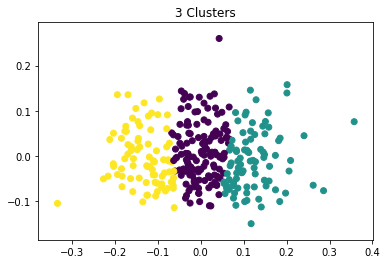

Comparing k-means clusters against the data:
col_0         0         1
row_0                    
0      0.214521  0.231023
1      0.082508  0.201320
2      0.161716  0.108911


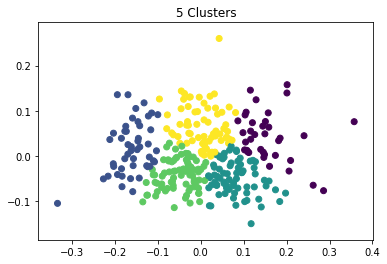

Comparing k-means clusters against the data:
col_0         0         1
row_0                    
0      0.049505  0.069307
1      0.118812  0.039604
2      0.046205  0.191419
3      0.112211  0.148515
4      0.132013  0.092409


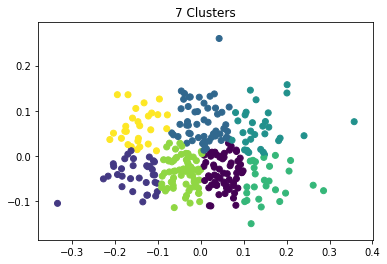

Comparing k-means clusters against the data:
col_0         0         1
row_0                    
0      0.046205  0.158416
1      0.062706  0.049505
2      0.112211  0.066007
3      0.052805  0.049505
4      0.009901  0.075908
5      0.102310  0.122112
6      0.072607  0.019802
Wall time: 2.43 s


In [7]:
%%time

for i in list(range(3,9,2)):
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_pca)
    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    TITLE=str(i)+' Clusters'
    plt.title(TITLE)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y, normalize=True))

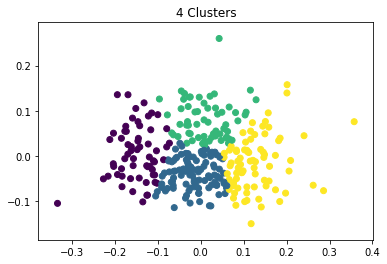

Comparing k-means clusters against the data:
col_0         0         1
row_0                    
0      0.132013  0.069307
1      0.122112  0.221122
2      0.138614  0.066007
3      0.066007  0.184818


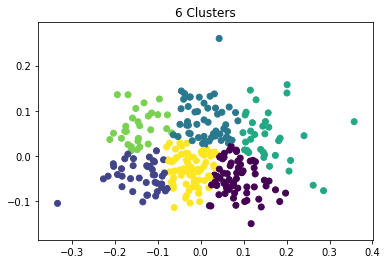

Comparing k-means clusters against the data:
col_0         0         1
row_0                    
0      0.046205  0.171617
1      0.066007  0.069307
2      0.112211  0.066007
3      0.046205  0.069307
4      0.075908  0.019802
5      0.112211  0.145215


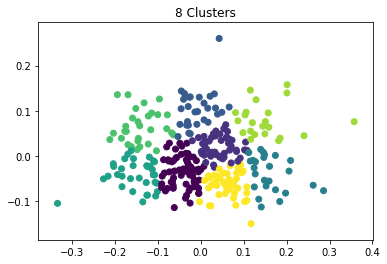

Comparing k-means clusters against the data:
col_0         0         1
row_0                    
0      0.105611  0.115512
1      0.072607  0.095710
2      0.056106  0.039604
3      0.016502  0.066007
4      0.062706  0.049505
5      0.079208  0.019802
6      0.039604  0.033003
7      0.026403  0.122112
Wall time: 2.38 s


In [9]:
%%time

for i in list(range(4,10,2)):
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_pca)
    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    TITLE=str(i)+' Clusters'
    plt.title(TITLE)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y, normalize=True))

## Conclusion
It appears as clusters increases the classifying power of K-Means gets diluted. Too many clusters can obfuscate the real patterns in the data and start to overfit the model to random noise.